[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/alexwolson/LabattCARTEBootcamp/blob/master/Lab1.ipynb)

# UofT CARTE Labatt ML Bootcamp
#### Lab 1
##### Lab author: Alexander Olson, alex.olson@utoronto.ca

In this lab, we will extend our work with Scikit-Learn from the introductory lab, looking at K-Nearest Neighbours and a range of linear classifiers. Finally, we will look at linear regression, and introduce the concept of regularizers.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

### Creating a k-Nearest Neighbors Classifier

Continuing on from the introductory lab, we are working using the toy "iris" dataset from scikit-learn. We've explored the data a little bit, and now we're going to use scikit-learn to create a k-nearest neighbors classifier for the data. Effectively we'll be developing a model whose job it is to build a relationship over input feature data (sepal and petal characteristics) that predicts the iris sample class (e.g. "setosa"). This is an example of a *supervised learning* task; we have all the features and all the target classes.

Nearest neightbors classifiers are quite simple. They predict the class of a new data sample based off the *nearest* data points to that sample. The 'nearest' metric is calculated via a distance function (often [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance)). 

<img src="https://github.com/alexwolson/LabattCARTEBootcamp/blob/master/img/knn.png?raw=1" alt="knn" width="200"/>

For example, in the above diagram, suppose we are looking to classify the green circle as either a red triangle, or a blue square. If k = 1 (i.e., we look at one neighbor), our model would predict *red triangle*. If k=2, it would still predict *red triangle*. If k=3, the model would predict *red triangle* as it is the *majority* class of the 3 nearest neighbors. It isn't until k=5 that the algorithm actually predicts *blue square*.

Model creation in scikit-learn follows a **data prep -> fit -> predict** process. The "fit" function is where the actual model is trained and parameter values are selected, while the "predict" function actually takes the trained model and applies it to the new samples.

First, we load the nearest neighbor library from scikit-learn:

In [2]:
from sklearn import neighbors

Now, we're going to save our feature data into an array called 'X' and our target data into an array called 'y'. We don't *need* to do this, but it is traditional to think of the problem using this notation.

In [3]:
from sklearn.datasets import load_iris
iris_data = load_iris()
X = iris_data.data
y = iris_data.target

Next, we create our nearest neighbor classifier object:

In [4]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1)

And then we *fit* it to the data (i.e., train the classifier).

In [5]:
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

Now we have a model! If you're new to this, you've officially built your first machine learning model. If you use "knn.predict(*[[feature array here]]*)", you can use your trained model to predict the class of a new iris sample. 

**YOUR TURN:**
* What is the predicted class of a new iris sample with feature vector [3,4,5,2]? What is its name? ________________
* Do you think this model is overfit or underfit to the iris dataset? Why? ________________
* How many neighbors does our model consider when classifying a new sample? ________________

As you may have noted in the previous cell, we've trained this classifier on our *entire dataset*. This typically isn't done in practice and results in overfitting to the data. Here's a bit of a tricky question:

**YOUR TURN:**
* If we use our classifier to predict the classes of the iris samples that were used to train the model itself, what will our overall accuracy be? ________________

We can validate our hypothesis fairly easily using either: i) the NumPy technique for calculating accuracy we used earlier in the lab, or ii) scikit-learn's in-house "accuracy_score()" function.

Let's use our technique first:

In [6]:
accuracy = np.sum(y == knn.predict(X)) / y.size
print ("Accuracy: ", accuracy * 100, "%")

Accuracy:  100.0 %


and then using scikit-learn's customized function:

In [7]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, knn.predict(X))
print ("Accuracy: ", accuracy * 100, "%")

Accuracy:  100.0 %


We see that our classifier has achieved 100% accuracy (and both calculation methods agree)!

**DISCUSSION:** 
* Why do you think the model was able to achieve such a "great" result? ______________________
* What does this really tell us?  __________________________________
* Do you expect the model to perform this well on new data? __________________________________

### Cross Validation

A popular way to mitigate this overfitting issue is to train your model on *some* of the data (the training set) and validate your model on the remaining data (the validation set). You will then select the model/configuration that performs best on the validation data. The train/validate division of the data is usually done with a 70%/30% split. Often, practitioners will use a third data set, the test set (or hold-out set), to get a sense for how their best model performs on unseen, real-world data. In this scenario, you will tune your models to perform best on the validation set and then test their "real-world" performance on the unseen test set.

Sometimes applications don't have enough data to do these splits meaningfully (e.g., the test data is only a few samples). In these cases, *cross-validation* is a useful technique (and, indeed, has become standard in machine learning practice). 

The general premise of "k-folds" cross validation is to first divide the entire dataset (grey) into a training set (green) and a test set (unseen data, blue). Then, we divide the training set into different folds and use these folds to form new sub-training and sub-test sets. We select the model configuration that performs the best on all of these. The below figure provides a nice visualization for what's going on here:

<img src="https://github.com/alexwolson/LabattCARTEBootcamp/blob/master/img/cross-val.png?raw=1" alt="cross-val" width="500"/>


Accomplishing k-folds cross validation in scikit-learn is a manageable task. First, we divide our data into a train and test set, then we conduct the cross validation and look at the mean scores across the splits, then we conduct our final evaluation.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

We have divided our data into two sections: training data (70% of the data) and testing data (30% of the data). Now we will fit our nearest neighbors classifier to the training data with 5 folds and see how it performs.

In [9]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.94 (+/- 0.11)


Our cross-validated model has an accuracy of 94% across all the splits on the training data. If we think that is a reasonable value, we can train our final model on the training data and then see how it performs on the held-out test data. 

##### Comparing classifiers
However, to get a true sense for the utility of cross-validation, let's create a second nearest neighbors classifier that uses two neighbors instead of one. 

In [10]:
knn2 = neighbors.KNeighborsClassifier(n_neighbors=2)
scores = cross_val_score(knn2, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.92 (+/- 0.13)


As we see above, our second classifier (the one with two neighbors) actually performs worse when cross-validated (92% vs. 94% mean accuracy on the 5 folds)! So, we'll stick with the first one. 

Let's train it on the training data and use it to predict the final held-out test data.

In [11]:
knn.fit(X_train, y_train)
accuracy = accuracy_score(y_test, knn.predict(X_test))
print ("Test set accuracy: ", accuracy * 100, "%")

Test set accuracy:  97.77777777777777 %


And we see our model has a 97.7% accuracy on the held out test data (30% of the original dataset).

# Regression: Introduction

The models we have looked at so far all fall under the umbrella term of _classification_. That is to say, these models take in some input data and return the predicted _class_ that data falls under. But there is another core type of model which we are yet to look at: _regression_ models.

Regression models take in some input value X, but instead of returning an expected class they output another numerical value. This is important because in some problems we don't want to limit ourselves to _discrete_ classes - think about the difference between a model which predicts a person's age, and a model which predicts the generation someone was born in.

**YOUR TURN**

* What is an example of a problem that should be solved using a _classifier_? __________
* What is an example of a problem that should be solved using a _regressor_? __________

# Regression: Ordinary Least Squares

One of the simplest regression models we will look at is Ordinary Least Squares (OLS), a type of linear regressor. OLS fits a linear model with coefficients $w = (w_1..w_p)$ to minimize the _residual sum of squares_ between the observed targets in the dataset, and the targets predicted by the regressor. That is to say, the objective of the model is to minimize the difference between the predicted and actual value for each training point, squared. This is represented mathematically by the _cost function_ below: $$min_w||Xw-y||^2_2$$

The subscript 2 refers to the fact that this computation is using L2 norm - for now, we will skip this, but it essentially refers to calculating the Euclidean distance between $Xw$ and $y$. The superscript 2 refers to the fact that this cost term is squared.

Let's now take two loosely correlated features from the wine dataset and plot them. We will use alcohol level and color intensity for our first regressor.

In [12]:
from sklearn.datasets import load_wine
wine_data = load_wine()

In [13]:
alcohol = wine_data.data[:,wine_data.feature_names.index('alcohol')]
color = wine_data.data[:,wine_data.feature_names.index('color_intensity')]

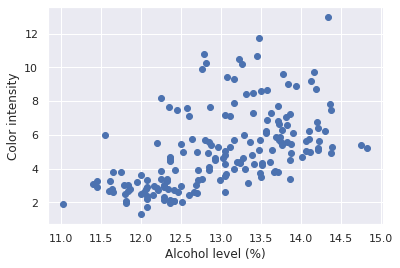

In [14]:
plt.scatter(alcohol,color)
plt.xlabel('Alcohol level (%)')
plt.ylabel('Color intensity');

In [15]:
from sklearn import linear_model

reg = linear_model.LinearRegression() #intialize

X_train,X_test,y_train,y_test = train_test_split(alcohol.reshape(-1,1), #Have to reshape because we only have one feature
                                                 color,
                                                 test_size=0.3,
                                                 random_state=0)

In [16]:
reg.fit(X_train,y_train); # fit

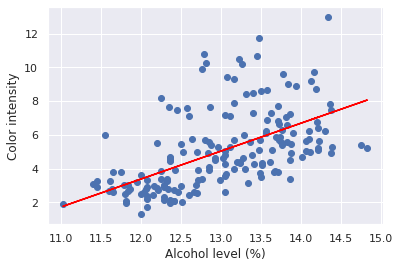

In [17]:
plt.scatter(alcohol,color)
plt.xlabel('Alcohol level (%)')
plt.ylabel('Color intensity');
plt.plot(alcohol, [(t * reg.coef_[0]) + reg.intercept_ for t in alcohol],c='red');

The red line here represents the prediction our model makes at each alcohol level. As you can see, although it does follow the general trend of the data, some of the data points are very far off the line.

Although it is technically possible to use our previous scoring methods to calculate the performance of this model, those scoring methods are designed for classification tasks and not for regression. Here, we should score our model using metrics better suited to the type of task. We will look at two: Mean Squared Error, and R-squared.

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
print("Mean Squared Error (MSE):\t%.2f" % (mean_squared_error(y_test, reg.predict(X_test))))
print("R-Squared Score:\t\t%.2f" % (r2_score(y_test, reg.predict(X_test))))

Mean Squared Error (MSE):	3.81
R-Squared Score:		0.24


R-Squared and MSE report two different ways of looking at the model's error. MSE is quite close to the loss function that OLS uses to fit the model in the first place - it calculates the average squared difference between the predicted value of the model, and the true target value. R-Squared, on the other hand, represents how closely the data conforms to the line we have calculated. 

Now that we have an intuition for how OLS works, let's expand from two dimensions to the full 13 dimensions available in the wine dataset. We will use 12 of the dimensions to predict one of the dimensions: alcohol percentage.

**YOUR TURN** Initialise a Linear Regression model, as above, fit the model to the 12 dimensions which are not `alcohol`, and then calculate the mean squared error and R-squared score on a testing set.

* What was the MSE? ______
* What was the R-Squared Score? ______
* Did the model perform well or poorly? Why? ______